# Numpy로 공부하는 선형대수 - 1

## @jhbale11

#### git : [github/jhbale11](https://github.com/jhbale11?tab=repositories)

#### velog : [환공지능](https://velog.io/@jhbale11)

-----------------------------------------------------------------------------------------------

데이터 분석을 시작하는데 꼭 필요한 선형 대수를 공부한다. 선형 대수는 데이터를 다루는 방법을 표시한 기호이자 언어로, 데이터를 다루는 법은 물론이고 연립 방정식을 사용하여 미지수의 값을 구하는 법 등에 사용되는 데이터 분석의 기본적인 도구이다. 따라서 Numpy로 선형대수학을 공부하고 익숙해지고자 한다.

## 학습 목표
- 각종 데이터를 선형 대수의 기호로 변환한다.
- 선형 대수의 각종 연산을 이용하여 데이터를 조작한다.
- 역행렬과 연립방정식의 해를 구하고 이를 회귀 분석과 예측 문제에 활용한다.

In [1]:
import numpy as np
import matplotlib.pylab as plt

## 데이터의 유형

선형대수에서 다루는 데이터는 개수나 형태에 따라 크게 스칼라(scalar), 벡터(vector), 행렬(matrix), 텐서(tensor) 유형으로 나뉜다. 

스칼라는 숫자 하나로 이루어진 데이터이고, 벡터는 여러 숫자로 이루어진 데이터 레코드(data record)이며, 행렬은 이러한 벡터, 즉 데이터 레코드가 여럿인 데이터 집합이라고 볼 수 있다. 텐서는 같은 크기의 행렬이 여러 개 있는 것이라고 생각하면 된다.

데이터 분석의 연습에서 많이 사용되는 벤치마크 데이터셋(benchmark dataset) 중 하나인 붓꽃 데이터셋(iris dataset)을 살펴보며 데이터 유형을 알아보자. 

이 데이터는 통계학자 피셔(Fisher)의 연구 결과에서 나온 것이다. 붓꽃 150송이에 대해 꽃받침의 길이, 꽃받침의 폭, 꽃잎의 길이, 꽃잎의 폭을 각각 측정한 것으로 150송이 중 50송이는 세토사(setosa)라는 종이고, 50송이는 베르시칼라(versicolor), 나머지 50송이는 버지니카(virginica)라는 종이다. 이 데이터셋은 붓꽃 크기를 이용하여 붓꽃의 종을 측정하는 예측(prediction) 문제로 활용된다.

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.data[0, :]  # 첫 번째 꽃의 데이터

array([5.1, 3.5, 1.4, 0.2])

In [3]:
x1 = np.array([[5.1], [3.5], [1.4], [0.2]])
x1

array([[5.1],
       [3.5],
       [1.4],
       [0.2]])

In [4]:
x1 = np.array([5.1, 3.5, 1.4, 0.2])
x1

array([5.1, 3.5, 1.4, 0.2])

## 연습 1

숫자 이미지를 입력받아 어떤 숫자인지 분류하는 문제를 생각해보자. 이미지는 원래 2차원 데이터이지만 예측 문제에서는 보통 1차원 벡터로 변환하여 사용한다. 아래의 데이터는 sklean에서 제공하는 손글씨 데이터셋으로, 원래의 이미지인 2차원 데이터를 1차원 벡터로 변환하여 보겠다.

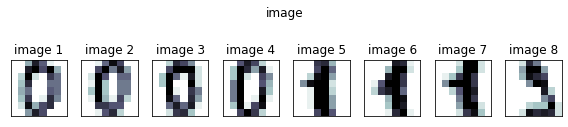

In [5]:
from sklearn.datasets import load_digits  # 패키지 임포트

digits = load_digits()  # 데이터 로드
samples = [0, 10, 20, 30, 1, 11, 21, 31]  # 선택된 이미지 번호
d = []
for i in range(8):
    d.append(digits.images[samples[i]])

plt.figure(figsize=(8, 2))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(d[i], interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title("image {}".format(i + 1))
plt.suptitle("image")
plt.tight_layout()
plt.show()

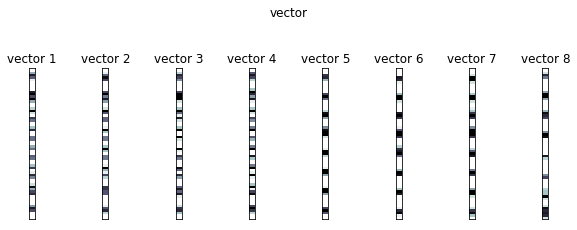

In [6]:
v = []
for i in range(8):
    v.append(d[i].reshape(64, 1))  # 벡터화
    
plt.figure(figsize=(8, 3))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(v[i], aspect=0.4,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title("vector {}".format(i + 1))
plt.suptitle("vector", y=1.05)
plt.tight_layout(w_pad=7)
plt.show()

## 행렬과 텐서

행렬은 복수의 차원을 가지는 데이터가 다시 여러개 있는 경우의 데이터를 다 합쳐서 표현한 것이며, 텐서는 같은 크기의 행렬이 여러개 같이 묶여 있는 것을 말한다. 엄격한 수학적 정의로는 텐서는 다차원 배열로 표현되는 Mapping으로 다차원 배열 자체를 뜻하지는 않으나, 데이터 사이언스 분야에서는 흔히 다차원 배열을 텐서라고 부른다.

In [7]:
A = np.array([[11,12,13],[21,22,23]])
A

array([[11, 12, 13],
       [21, 22, 23]])

In [8]:
# Transpose 연산 : 행과 열을 바꾸는 연산
A.T

array([[11, 21],
       [12, 22],
       [13, 23]])

In [9]:
# Square Matrix : 정방 행렬을 생성
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [10]:
# Identity Matrix : 항등 행렬을 생성
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [11]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

## 벡터/행렬의 연산

## Element-Wise 연산

같은 크기를 가진 두 개의 벡터나 행렬은 덧셈과 뺄셈을 할 수 있다. 두 벡터와 행렬에서 같은 위치에 있는 원소끼리 덧셈과 뺄셈을 하면 된다. 이러한 연산을 element-wise 연산이라고 한다.

In [12]:
x = np.array([10, 11, 12, 13, 14])
y = np.array([0, 1, 2, 3, 4])

In [13]:
x+y

array([10, 12, 14, 16, 18])

In [14]:
x-y

array([10, 10, 10, 10, 10])

In [15]:
np.array([[5, 6], [7, 8]]) + np.array([[10, 20], [30, 40]]) - np.array([[1, 2], [3, 4]])

array([[14, 24],
       [34, 44]])

## 벡터의 내적(Linear Product)

벡터를 곱셈하는 방법은 여러가지가 있지만 보통 내적(Linear Product)에 대해서만 다룬다. 벡터 x와 벡터 y의 내적은 다음처럼 표기한다.

$
x^T y 
$

내적은 다음처럼 dot으로 표기하는 경우도 있어서 dot product라고도 부르고 $<x,y>$ 기호로 나타낼 수도 있다.

$
x \cdot y = \, < x, y > \, = x^T y
$

두 벡터를 내적하려면 다음과 같은 조건이 만족되어야 한다.
- 두 벡터의 차원(길이)가 같아야 한다.
- 앞의 벡터가 행 벡터이고 뒤의 벡터가 열 벡터이어야 한다.

In [16]:
x = np.array([[1], [2], [3]])
y = np.array([[4], [5], [6]])

x.T @ y

array([[32]])

In [17]:
np.dot(x.T, y)

array([[32]])

## 가중합(Weighted Sum)

벡터의 내적은 가중합을 계산할 때 쓰일 수 있다. 가중합이란 복수의 데이터를 단순히 합하는 것이 아니라 각각의 수에 어떤 가중치 값을 곱한 후 이 곱셈 결과들을 다시 합한 것을 말한다.

만약 데이터 벡터가 $x=[x_1, \cdots, x_N]^T$이고 가중치 벡터가 $w=[w_1, \cdots, w_N]^T$이면 데이터 벡터의 가중합은 다음과 같다.

$
w_1 x_1 + \cdots + w_N x_N = \sum_{i=1}^N w_i x_i 
$

이 값을 벡터 x와 w의 곱으로 나타내면 $w^Tx$또는 $x^Tw$라는 간단한 수식으로 표시할 수 있다.

## 가중 평균(Weighted Average)

가중합의 가중치값을 전체 가중치값의 합으로 나누면 가중평균이 된다. 벡터로 표현된 N개의 데이터의 단순 평균은 다음처럼 생각할 수 있다.

$
\bar{x} = \dfrac{1}{N}\sum_{i=1}^N x_i = \dfrac{1}{N} \mathbf{1}_N^T x
$

In [18]:
x = np.arange(10)
N = len(x)

np.ones(N) @ x / N

4.5

In [19]:
# Mean Method를 사용하는 것이 편하다!
x.mean()

4.5

## 유사도(Similarity)

벡터의 내적은 두 벡터 간의 유사도를 계산하는데도 이용할 수 있다. 유사도는 두 벡터가 닮은 정도를 정량적으로 나타낸 값으로 두 벡터가 비슷한 경우에는 유사도가 커지고, 비슷하지 않은 경우에는 유사도가 작아진다. 

위에서 불러왔던 MNIST 이미지에 대해서 내적을 계산해보면 아래와 같다.

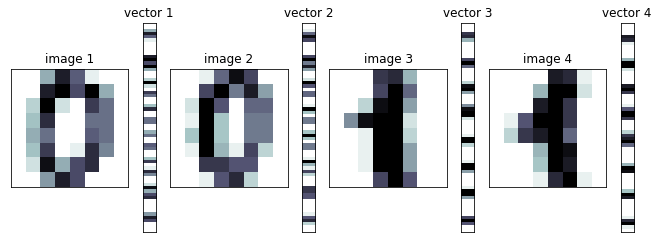

In [20]:
from sklearn.datasets import load_digits
import matplotlib.gridspec as gridspec

digits = load_digits()
d1 = digits.images[0]
d2 = digits.images[10]
d3 = digits.images[1]
d4 = digits.images[11]
v1 = d1.reshape(64, 1)
v2 = d2.reshape(64, 1)
v3 = d3.reshape(64, 1)
v4 = d4.reshape(64, 1)

plt.figure(figsize=(9, 9))
gs = gridspec.GridSpec(1, 8, height_ratios=[1],
                       width_ratios=[9, 1, 9, 1, 9, 1, 9, 1])
for i in range(4):
    plt.subplot(gs[2 * i])
    plt.imshow(eval("d" + str(i + 1)), aspect=1,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("image {}".format(i + 1))
    plt.subplot(gs[2 * i + 1])
    plt.imshow(eval("v" + str(i + 1)), aspect=0.25,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("vector {}".format(i + 1))
plt.tight_layout()
plt.show()

In [21]:
(v1.T @ v2)[0][0], (v3.T @ v4)[0][0]

(3064.0, 3661.0)

In [22]:
(v1.T @ v3)[0][0], (v1.T @ v4)[0][0], (v2.T @ v3)[0][0], (v2.T @ v4)[0][0]

(1866.0, 1883.0, 2421.0, 2479.0)

0과 0 이미지 또는 1과 1의 이미지의 내적값에 비해서 0과 1의 이미지, 1과 0의 이미지의 내적값은 작다.
이를 통해 내적값이 큰 경우에는 유사한 이미지이며, 내적값이 작은 경우 비유사한 이미지임을 알 수 있다.

## 선형회귀모형(Linear Regression Model)

선형회귀모형이란 독립변수 x에서 종속변수 y를 예측하는 하나의 방법으로 독립변수 x와 가중치 벡터 w와의 가중합으로 y에 대한 예측값 $\hat{y}$를 계산하는 수식을 말한다.

$
\hat{y} = w_1 x_1 + \cdots + w_N x_N
$

위 수식은 다음처럼 벡터의 내적으로도 나타낼 수 있다.

$
\hat{y} = w^Tx
$

## 제곱합(Sum of Squares)

데이터의 분산이나 표준편차를 구하는 경우에는 각각의 데이터를 제곱한 뒤 이 값을 모두 더하는 제곱합을 계산해야 한다. 이 경우에도 벡터의 내적을 사용하여 $x^Tx$로 쓸 수 있다.

$
x^T x = 
\begin{bmatrix}
x_{1} & x_{2} & \cdots & x_{N} 
\end{bmatrix}
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{N} \\
\end{bmatrix} = \sum_{i=1}^{N} x_i^2
$

## 잔차(Residual)

선형 회귀분석을 한 결과는 가중치 벡터 w라는 형태로 나타나고, 예측치는 이 가중치 벡터를 사용한 독립변수 데이터 레코드 즉 벡터 x의 가중합 $w^Tx$이 된다고 하였다. 이 때 예측치와 실제값(Target)의 차이를 오차(Error) 또는 잔차(Residual)이라고 한다. 이러한 잔차값을 모든 독립변수 벡터에 대해 구하면 잔차 벡터 $e$가 된다.

$
e_i = y_i - \hat{y}_i  = y_i - w^Tx_i
$

잔차 벡터는 $y-Xw$로 간단하게 표기할 수도 있다.

## 잔차 제곱합(RSS : Residual Sum of Squares)

잔차의 크기는 잔차 벡터의 각 원소를 제곱한 후 더한 잔차 제곱합을 이용하여 구한다. 이 값은 $e^Te$로 간단하게 쓸 수 있으며 그 값은 다음처럼 계산한다.


$
\sum_{i=1}^{N} e_i^2 = \sum_{i=1}^{N} (y_i - w^Tx_i)^2 = e^Te =  (y - Xw)^T (y - Xw)
$

## 이차 형식(Quadratic Form)

$(y - Xw)^T (y - Xw)$을 분배 법칙으로 풀어 쓰면 아래와 같은 결과를 얻을 수 있다.

$
(y - Xw)^T (y - Xw) = y^Ty - w^TX^Ty - y^TXw + w^TX^TXw  
$

이 때 마지막 항인 $w^TX^TXw$에서 $X^TX$는 정방 행렬이 되므로 이 정방 행렬을 $A$라고 이름 붙이면 마지막 항은 $w^TAw$와 같은 형태가 된다. 벡터의 이차 형식이란 이처럼 어떤 벡터와 정방 행렬이 '행벡터 x 정방행렬 x 열벡터'의 형식으로 되어 있는 것을 말한다.

In [23]:
x = np.array([1, 2, 3])
x

array([1, 2, 3])

In [24]:
A = np.arange(1, 10).reshape(3, 3)
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [25]:
# 이차형식은 아래와 같다.
x.T @ A @ x

228